In [1]:
import pandas as pd
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
meta = pd.read_csv('scent_annot.csv', index_col=(0))
meta

,scent,class,types,types2
sample,,,,
A10,0.462825,GSM3370006_hesc_val_scent.csv,Pluripotent,Pluripotent
A11,0.465751,GSM3370006_hesc_val_scent.csv,Pluripotent,Pluripotent
A17,0.451588,GSM3370006_hesc_val_scent.csv,Pluripotent,Pluripotent
A21,0.451164,GSM3370006_hesc_val_scent.csv,Pluripotent,Pluripotent
A8,0.457610,GSM3370006_hesc_val_scent.csv,Pluripotent,Pluripotent
...,...,...,...,...
hu_080619_TCAAGCAGTAGACACG,0.273942,GSE143704_uni_human_final_scent.csv,Unipotent,Unipotent
hu_080619_TCACGGGGTGGCATCC,0.302165,GSE143704_uni_human_final_scent.csv,Unipotent,Unipotent
hu_080619_TCACTCGAGGCAGGGA,0.287302,GSE143704_uni_human_final_scent.csv,Unipotent,Unipotent


In [3]:
meta['class'].unique()

array(['GSM3370006_hesc_val_scent.csv', 'D02_scent.csv',
       'hESC_E-MTAB-6819_scent.csv', 'A03_scent.csv',
       'hESC_E-MTAB-3929_scent.csv',
       'GSE136831_husc_lung_val_data_scent.csv',
       'GSE147482_hmsc_skin_scent.csv',
       'Q65X273X_uni_human_val_scent.csv',
       'GSE248995_husc_neuron_scent.csv', 'A02_scent.csv',
       'D01_scent.csv', 'GSE221853_hmsc_neuron_train_data_scent.csv',
       'GSE36552_hesc_val_scent.csv',
       'GSE143704_uni_human_final_scent.csv'], dtype=object)

In [4]:
with open("common_genes.txt", "r") as file:
    common_genes = [line.strip() for line in file]
len(common_genes)

8980

In [5]:
hesc = pd.read_csv('hESC_E-MTAB-3929.txt', sep='\t', index_col=(0)).T
hesc = hesc[hesc.index.isin(meta.index)]
hesc = hesc[common_genes]
hesc

,SLC33A1,RAP2C,SLC9A9,FSCN1,TCP10L,FGFR1OP,DPCD,PTPN2,RALY,BTBD6,...,ZNF274,GABARAPL1,RAB2B,SERTAD2,PIAS4,CTSA,BEX4,HAS3,KIF20B,NUDCD2
E5.5.101,12,0,0,11,6,17,20,22,11,2,...,24,8,2,21,25,234,13,0,58,17
E5.5.100,0,12,0,18,0,14,7,13,19,0,...,0,7,5,46,8,95,68,0,81,40
E6.2.114,0,11,0,59,0,11,0,5,9,0,...,1,28,0,27,30,5,10,0,190,2
E6.2.104,8,2,0,19,0,3,0,7,11,0,...,0,0,5,6,11,14,6,0,2,13
E6.2.107,0,16,0,19,0,11,0,1,2,0,...,0,0,0,18,6,20,1,0,164,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E5.10.949,0,0,0,23,0,13,0,0,31,0,...,0,10,0,33,0,0,0,0,7,0
E5.10.941,7,1,0,11,0,14,1,45,26,1,...,0,134,4,15,9,12,3,0,9,3
E5.9.925,129,160,0,235,0,466,73,420,634,139,...,198,1059,18,317,181,1051,38,1,433,555
E5.11.965,49,77,0,304,0,186,55,170,102,75,...,42,952,9,17,32,71,29,0,167,104


In [6]:
hesc2 = pd.read_csv('hESC_E-MTAB-6819.csv', sep=',', index_col=(0)).T
hesc2.index = ['X' + str(i) for i in hesc2.index]
hesc2 = hesc2[hesc2.index.isin(meta.index)]
hesc2 = hesc2[common_genes]
hesc2

HGNC_ID,SLC33A1,RAP2C,SLC9A9,FSCN1,TCP10L,FGFR1OP,DPCD,PTPN2,RALY,BTBD6,...,ZNF274,GABARAPL1,RAB2B,SERTAD2,PIAS4,CTSA,BEX4,HAS3,KIF20B,NUDCD2
X2739.tsv_2,29,38,0,5,0,0,33,68,19,0,...,13,0,0,0,1,11,155,0,236,81
X2739.tsv_6,40,54,0,8,0,11,6,47,19,2,...,0,5,0,0,0,9,81,0,168,73
X2739.tsv_13,27,27,0,6,0,8,40,29,17,5,...,15,98,0,0,0,2,98,0,108,140
X2739.tsv_14,21,81,0,5,0,7,25,69,21,2,...,0,17,3,0,0,2,95,0,79,86
X2739.tsv_20,0,48,0,19,0,11,15,65,13,0,...,0,45,0,0,3,17,110,0,228,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X2678.tsv_375,0,39,0,20,0,5,6,85,17,0,...,16,85,0,0,16,56,7,0,66,57
X2678.tsv_378,78,181,0,23,2,14,5,141,11,0,...,26,29,15,14,0,29,39,0,96,47
X2678.tsv_379,31,27,0,10,0,2,3,81,27,0,...,7,16,0,0,4,13,12,0,30,40
X2678.tsv_380,79,56,0,17,2,10,0,277,13,5,...,1,63,12,0,15,51,56,0,58,39


In [7]:
hesc_val = pd.read_csv('GSM3370006_hesc_val.csv', sep=',', index_col=(0)).T
# hesc_val = hesc_val[hesc_val.index.isin(meta.index)]
hesc_val = hesc_val[common_genes]
hesc_val

HGNC_ID,SLC33A1,RAP2C,SLC9A9,FSCN1,TCP10L,FGFR1OP,DPCD,PTPN2,RALY,BTBD6,...,ZNF274,GABARAPL1,RAB2B,SERTAD2,PIAS4,CTSA,BEX4,HAS3,KIF20B,NUDCD2
A10,2,5,0,14,0,2,0,3,0,0,...,2,2,0,4,2,1,0,3,21,3
A11,1,1,0,16,0,5,0,2,0,0,...,2,7,0,1,3,1,1,4,9,2
A12,1,2,0,6,0,2,0,2,0,0,...,1,1,0,0,1,0,1,0,9,2
A13,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
A14,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P5,1,1,0,14,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,2,1
P6,0,13,0,39,0,4,0,2,0,2,...,3,8,0,1,3,4,8,2,21,6
P7,0,10,0,20,0,7,0,5,1,4,...,3,4,0,2,6,8,3,6,27,6
P8,0,14,0,35,0,6,0,2,1,0,...,2,1,0,1,6,3,1,2,23,4


In [8]:
hesc_val2 = pd.read_csv('GSE36552_hesc_val.csv', sep=',', index_col=(0)).T
# hesc_val = hesc_val[hesc_val.index.isin(meta.index)]
hesc_val2 = hesc_val2[common_genes]
hesc_val2

,SLC33A1,RAP2C,SLC9A9,FSCN1,TCP10L,FGFR1OP,DPCD,PTPN2,RALY,BTBD6,...,ZNF274,GABARAPL1,RAB2B,SERTAD2,PIAS4,CTSA,BEX4,HAS3,KIF20B,NUDCD2
GSM922210,0.113975,6.275940,0.000000,6.722894,0.000000,91.062069,0.000000,94.321095,7.922762,0.406471,...,5.527355,29.954026,0.254195,9.780457,0.607517,6.895200,9.344177,12.644571,36.788809,65.276135
GSM896803,19.172740,0.772695,5.916107,0.000000,0.000000,24.385271,32.131444,50.225594,16.388426,2.042857,...,1.492291,1.283519,4.875475,0.680509,44.548097,0.866663,0.000000,62.473823,51.381440,118.706259
GSM922158,0.782736,0.018951,0.000000,2.872213,0.000000,21.516438,19.516223,53.949816,10.421886,0.000000,...,3.623423,148.593466,8.401244,10.787225,8.289154,0.065251,5.030155,3.003985,46.422236,44.379407
GSM922262,0.070887,3.611047,0.000000,9.354413,0.300374,29.372027,71.035813,24.907094,7.584981,6.098405,...,8.959824,25.068596,0.996006,6.394376,9.770597,8.887563,93.524168,6.503559,19.686940,137.961000
GSM922177,5.547061,0.000000,0.000000,1.626610,0.000000,6.418404,16.639774,91.338286,50.624902,7.796137,...,2.629318,180.335598,2.379411,3.069889,19.695763,0.000000,0.000000,0.871141,5.300330,45.095692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM896805,14.938710,0.430035,7.028195,0.000000,0.000000,28.784227,24.291888,73.952916,18.619677,1.705393,...,1.085218,3.270406,3.651823,1.785438,35.676604,0.766763,0.000000,61.663696,49.526783,132.766918
GSM922226,0.209733,0.812476,0.000000,3.711372,0.000000,49.852928,17.714733,36.555616,6.752851,0.000000,...,0.984963,26.550769,6.084801,18.991133,14.960570,0.279742,35.983774,11.382433,18.416109,31.373084
GSM922191,12.760476,0.000000,0.016423,6.285239,0.485933,1.295915,19.700384,33.618251,9.653507,10.540423,...,9.295334,563.623035,16.438504,14.009608,8.752142,7.613080,0.000000,12.737277,10.701813,9.998176
GSM922189,4.721776,0.000000,0.000000,2.263095,0.000000,0.172478,0.067867,50.826735,11.361860,9.285823,...,12.862095,460.126895,12.693039,14.401180,13.703429,8.204351,0.000000,8.501951,18.993993,16.012984


In [9]:
hmsc_a02 = ad.read_h5ad('A02_RAW.h5ad')
hmsc_a02 = pd.DataFrame(hmsc_a02.X.toarray(), index=hmsc_a02.obs_names, columns=hmsc_a02.var_names).astype(int)
hmsc_a02.index = hmsc_a02.index.str.replace('-', '.')
# hmsc_a02 = hmsc_a02[hmsc_a02.index.isin(meta.index)]
hmsc_a02 = hmsc_a02[common_genes]
hmsc_a02

,SLC33A1,RAP2C,SLC9A9,FSCN1,TCP10L,FGFR1OP,DPCD,PTPN2,RALY,BTBD6,...,ZNF274,GABARAPL1,RAB2B,SERTAD2,PIAS4,CTSA,BEX4,HAS3,KIF20B,NUDCD2
AAACCTGAGAATTGTG.1.9,0,0,0,3,1,0,2,0,5,0,...,0,0,0,0,0,9,1,0,0,5
AAACCTGAGCCAGAAC.1.9,1,0,0,5,0,0,5,2,5,0,...,0,3,0,1,3,8,0,0,0,4
AAACCTGAGTACGTAA.1.9,0,0,0,4,0,0,0,1,0,0,...,0,0,0,1,0,3,2,0,0,2
AAACCTGAGTTCGCAT.1.9,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,2,0,0,1
AAACCTGAGTTTCCTT.1.9,0,0,0,2,0,0,2,1,3,0,...,0,0,0,0,0,5,0,0,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCCCTAACC.1.9,0,0,0,4,0,0,1,2,1,0,...,1,2,0,1,0,3,0,0,0,1
TTTGTCATCCTTTACA.1.9,0,0,0,3,0,1,4,2,5,0,...,0,0,0,0,0,0,2,0,1,2
TTTGTCATCGGCTACG.1.9,0,0,0,3,0,0,1,2,3,0,...,0,1,1,0,0,1,0,0,1,0
TTTGTCATCGTCTGCT.1.9,1,0,0,0,0,0,0,1,1,0,...,0,0,0,1,1,2,3,0,0,2


In [10]:
hmsc_a03 = ad.read_h5ad('A03_RAW.h5ad')
hmsc_a03 = pd.DataFrame(hmsc_a03.X.toarray(), index=hmsc_a03.obs_names, columns=hmsc_a03.var_names).astype(int)
hmsc_a03.index = hmsc_a03.index.str.replace('-', '.')
hmsc_a03 = hmsc_a03[hmsc_a03.index.isin(meta.index)]
hmsc_a03 = hmsc_a03[common_genes]
hmsc_a03

,SLC33A1,RAP2C,SLC9A9,FSCN1,TCP10L,FGFR1OP,DPCD,PTPN2,RALY,BTBD6,...,ZNF274,GABARAPL1,RAB2B,SERTAD2,PIAS4,CTSA,BEX4,HAS3,KIF20B,NUDCD2
AAACCTGAGAGCTGGT.1.10,0,1,0,0,0,0,0,1,2,0,...,0,2,0,0,0,7,0,0,0,4
AAACCTGAGCTAAGAT.1.10,0,0,1,2,0,0,2,1,2,1,...,1,1,0,0,0,2,1,0,1,4
AAACCTGAGGACAGAA.1.10,0,0,0,2,0,1,0,0,2,1,...,0,1,0,0,0,5,1,0,0,2
AAACCTGAGGAGCGAG.1.10,0,0,1,7,0,0,0,0,1,1,...,0,2,0,0,0,3,0,0,1,1
AAACCTGCAACCGCCA.1.10,1,2,0,1,0,0,2,2,4,0,...,0,0,0,1,1,2,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTAAGTGGC.1.10,0,0,0,1,0,0,1,1,0,0,...,1,0,0,1,0,7,0,0,0,2
TTTGTCAGTGATGATA.1.10,0,0,1,2,0,0,1,3,2,0,...,0,3,0,0,0,4,0,0,0,5
TTTGTCAGTTCGCTAA.1.10,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,5,1,0,0,1
TTTGTCATCACCTTAT.1.10,0,0,0,3,0,0,1,0,1,0,...,0,1,0,0,0,3,2,0,0,1


In [11]:
hmsc_d01 = ad.read_h5ad('D01_RAW.h5ad')
hmsc_d01 = pd.DataFrame(hmsc_d01.X.toarray(), index=hmsc_d01.obs_names, columns=hmsc_d01.var_names).astype(int)
hmsc_d01.index = hmsc_d01.index.str.replace('-', '.')
# hmsc_d01 = hmsc_d01[hmsc_d01.index.isin(meta.index)]
hmsc_d01 = hmsc_d01[common_genes]
hmsc_d01

,SLC33A1,RAP2C,SLC9A9,FSCN1,TCP10L,FGFR1OP,DPCD,PTPN2,RALY,BTBD6,...,ZNF274,GABARAPL1,RAB2B,SERTAD2,PIAS4,CTSA,BEX4,HAS3,KIF20B,NUDCD2
AAACCTGAGAAGAAGC.1.0,1,0,0,3,0,0,1,0,2,0,...,0,0,0,0,0,0,0,0,2,0
AAACCTGAGATGTTAG.1.0,0,0,0,0,0,0,2,0,1,0,...,0,0,0,0,0,2,0,0,0,0
AAACCTGAGCGTCTAT.1.0,0,0,0,0,0,0,2,1,1,0,...,0,1,1,0,0,1,0,0,0,1
AAACCTGAGCTAACTC.1.0,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,1,1,0,2,0
AAACCTGAGCTAGTGG.1.0,1,0,0,5,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCGTGGGAA.1.0,0,0,0,1,0,0,2,0,8,0,...,0,0,0,0,0,7,0,0,1,2
TTTGTCATCTAAGCCA.1.0,0,0,0,3,0,0,3,0,4,0,...,0,1,0,1,0,1,1,0,0,4
TTTGTCATCTAGAGTC.1.0,0,0,0,1,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,0,1
TTTGTCATCTCCCTGA.1.0,0,0,0,2,0,0,0,0,2,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
hmsc_d02 = ad.read_h5ad('D02_RAW.h5ad')
hmsc_d02 = pd.DataFrame(hmsc_d02.X.toarray(), index=hmsc_d02.obs_names, columns=hmsc_d02.var_names).astype(int)
hmsc_d02.index = hmsc_d02.index.str.replace('-', '.')
hmsc_d02 = hmsc_d02[hmsc_d02.index.isin(meta.index)]
hmsc_d02 = hmsc_d02[common_genes]
hmsc_d02

,SLC33A1,RAP2C,SLC9A9,FSCN1,TCP10L,FGFR1OP,DPCD,PTPN2,RALY,BTBD6,...,ZNF274,GABARAPL1,RAB2B,SERTAD2,PIAS4,CTSA,BEX4,HAS3,KIF20B,NUDCD2
AAACCTGAGACACTAA.1.1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
AAACCTGAGACATAAC.1.1,0,0,0,2,0,0,0,0,1,0,...,0,0,0,0,0,1,2,0,0,0
AAACCTGAGACTAAGT.1.1,0,0,0,2,0,0,0,0,0,0,...,0,1,0,0,0,2,0,0,0,0
AAACCTGAGAGCCCAA.1.1,0,0,0,2,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
AAACCTGAGATATGGT.1.1,0,0,0,2,0,0,1,1,4,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCGTTTGCC.1.1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,2,0,0,0,1
TTTGTCATCTACTATC.1.1,0,0,0,1,0,0,1,0,2,0,...,0,1,0,1,0,1,1,0,0,2
TTTGTCATCTCTGCTG.1.1,0,0,0,2,0,0,0,0,4,0,...,0,0,0,0,0,0,1,0,0,1
TTTGTCATCTGTCAAG.1.1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
hmsc_skin = pd.read_csv('GSE147482_hmsc_skin.csv', index_col=(0)).T
hmsc_skin = hmsc_skin[hmsc_skin.index.isin(meta.index)]
hmsc_skin = hmsc_skin[common_genes]
hmsc_skin

,SLC33A1,RAP2C,SLC9A9,FSCN1,TCP10L,FGFR1OP,DPCD,PTPN2,RALY,BTBD6,...,ZNF274,GABARAPL1,RAB2B,SERTAD2,PIAS4,CTSA,BEX4,HAS3,KIF20B,NUDCD2
hmsc_skin_0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.375733,0.648211,0.000000,...,0.0,0.0,0.0,0.000000,0.375733,0.375733,0.648211,0.000000,0.648211,1.187933
hmsc_skin_1,0.000000,0.900319,0.0,0.000000,0.0,0.000000,0.548233,0.900319,0.548233,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.900319,0.000000,1.160203,0.900319
hmsc_skin_3,0.533635,0.533635,0.0,0.000000,0.0,0.000000,0.533635,0.000000,0.879726,0.000000,...,0.0,0.0,0.0,0.533635,0.000000,0.879726,0.533635,0.000000,1.509749,0.000000
hmsc_skin_6,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.939367,0.939367,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.736085,0.000000,1.415057,0.000000
hmsc_skin_7,0.000000,0.000000,0.0,0.000000,0.0,0.450763,0.000000,0.000000,0.760346,0.450763,...,0.0,0.0,0.0,0.000000,0.000000,0.450763,0.000000,0.000000,0.760346,0.760346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hmsc_skin_569,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.545078,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.309227,0.309227,0.000000,0.000000,1.676808,0.545078
hmsc_skin_571,0.000000,0.000000,0.0,0.927383,0.0,0.927383,0.000000,0.000000,0.927383,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.927383,1.400140,0.000000
hmsc_skin_572,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.415231,0.415231,0.415231,0.000000,...,0.0,0.0,0.0,0.415231,0.000000,0.415231,0.000000,0.415231,1.728551,0.707761
hmsc_skin_573,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.863387,1.319715,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.631891,1.319715


In [14]:
hmsc_neur = pd.read_csv('GSE221853_hmsc_neuron_train_data.csv', index_col=(0))
hmsc_neur = hmsc_neur[hmsc_neur.index.isin(meta.index)]
hmsc_neur = hmsc_neur[common_genes]
hmsc_neur

,SLC33A1,RAP2C,SLC9A9,FSCN1,TCP10L,FGFR1OP,DPCD,PTPN2,RALY,BTBD6,...,ZNF274,GABARAPL1,RAB2B,SERTAD2,PIAS4,CTSA,BEX4,HAS3,KIF20B,NUDCD2
G3_AAACCCACAAATTGGA,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
G3_AAACGAACACCACATA,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
G3_AAAGGTATCTCTCTAA,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
G3_AAAGTCCTCATTTGCT,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
G3_AAAGTGATCACGGGAA,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G23_TGGTACATCGGTGCAC,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
G23_TTTATGCCAATCTCTT,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
G17_AGACAAAGTGTCTAAC,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
G17_CAATTTCTCACCATCC,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [15]:
husc = pd.read_csv('GSE143704_uni_human_final.csv', sep=',', index_col=(0)).T
husc = husc[husc.index.isin(meta.index)]
husc = husc[common_genes]
husc

,SLC33A1,RAP2C,SLC9A9,FSCN1,TCP10L,FGFR1OP,DPCD,PTPN2,RALY,BTBD6,...,ZNF274,GABARAPL1,RAB2B,SERTAD2,PIAS4,CTSA,BEX4,HAS3,KIF20B,NUDCD2
hu_092618_AAACGGGCATCTCCCA,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,2,0,0,0
hu_092618_AAATGCCCAGGTCGTC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hu_092618_AAATGCCCATCACCCT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
hu_092618_AACCATGGTTATGTGC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hu_092618_AACTCAGAGGTAAACT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hu_080619_TCAAGCAGTAGACACG,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
hu_080619_TCACGGGGTGGCATCC,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
hu_080619_TCACTCGAGGCAGGGA,0,0,1,0,0,0,0,0,0,0,...,0,2,0,0,0,0,1,0,0,0
hu_080619_TCGAAGTGTATCACCA,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0


In [16]:
husc_neur = pd.read_csv('GSE248995_husc_neuron.csv', sep=',', index_col=(0))
husc_neur = husc_neur[husc_neur.index.isin(meta.index)]
husc_neur = husc_neur[common_genes]
husc_neur

,SLC33A1,RAP2C,SLC9A9,FSCN1,TCP10L,FGFR1OP,DPCD,PTPN2,RALY,BTBD6,...,ZNF274,GABARAPL1,RAB2B,SERTAD2,PIAS4,CTSA,BEX4,HAS3,KIF20B,NUDCD2
SVZ395_CCAGCGAAGGTGCACA,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,2
SVZ395_CTGAAGTTCACTATTC,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
SVZ395_GCATACATCTACCTGC,0,2,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
SVZ395_TGGGCGTGTAGGCTGA,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
SVZ400_AGCAGCCGTCGAAAGC,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SVZ428_TTATGCTCAGCTGCAC,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
SVZ428_TTCGGTCCACCCTATC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
SVZ444_ATAGACCAGTTCGATC,1,0,0,0,0,0,1,0,0,0,...,0,4,1,0,0,0,0,0,0,1
SVZ444_CCGTTCAGTCATACTG,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0


In [17]:
husc_lung = pd.read_csv('GSE136831_husc_lung_val_data.csv', sep=',', index_col=(0)).T
husc_lung.index = ['X' + str(i) for i in husc_lung.index]
husc_lung = husc_lung[husc_lung.index.isin(meta.index)]
husc_lung = husc_lung[common_genes]
husc_lung

HGNC_EnsemblAlt_GeneID,SLC33A1,RAP2C,SLC9A9,FSCN1,TCP10L,FGFR1OP,DPCD,PTPN2,RALY,BTBD6,...,ZNF274,GABARAPL1,RAB2B,SERTAD2,PIAS4,CTSA,BEX4,HAS3,KIF20B,NUDCD2
X001C_ACACCCTCATTGTGCA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X001C_AGGGAGTGTTGTGGAG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X001C_ATTATCCGTTCCATGA,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,1,0,0,0,0,0
X001C_CGGAGTCAGCTAGCCC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X001C_CTAAGACAGTGCTGCC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X8CO_GTCAAGTAGGTGCAAC,1,0,0,0,0,0,0,2,2,0,...,0,0,0,1,0,0,3,0,0,1
X8CO_GTCTCGTAGAGTGACC,0,0,0,0,0,0,0,4,9,0,...,0,0,1,0,0,0,0,0,0,1
X8CO_GTTCATTTCCAAAGTC,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
X8CO_TGGTTCCGTCTCACCT,0,0,0,0,0,0,0,1,0,0,...,0,0,0,2,0,0,0,0,0,0


In [18]:
import os
import pandas as pd
from scipy.io import mmread
base_path = "/data1/Projects/ACSCEND/Stem_Data/Q65X273X"

df_list = []

for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder, 'filtered_feature_bc_matrix')
    if os.path.isdir(folder_path):
        barcodes = pd.read_csv(os.path.join(folder_path, 'barcodes.tsv.gz'), header=None, sep='\t')
        features = pd.read_csv(os.path.join(folder_path, 'features.tsv.gz'), header=None, sep='\t')
        matrix = mmread(os.path.join(folder_path, 'matrix.mtx.gz')).toarray()
        matrix_df = pd.DataFrame(matrix, index=list(features[1]), columns=list(barcodes[0]))
        matrix_df.index.name = None
        matrix_df = matrix_df[~matrix_df.index.duplicated(keep='first')]
        matrix_df = matrix_df[matrix_df.index.isin(common_genes)]
        df_list.append(matrix_df)

In [19]:
husc_val = pd.concat(df_list, axis=1)
husc_val.index.name = None
husc_val = husc_val.T
# husc_val = husc_val[husc_val.index.isin(meta.index)]
husc_val = husc_val[common_genes]
husc_val

,SLC33A1,RAP2C,SLC9A9,FSCN1,TCP10L,FGFR1OP,DPCD,PTPN2,RALY,BTBD6,...,ZNF274,GABARAPL1,RAB2B,SERTAD2,PIAS4,CTSA,BEX4,HAS3,KIF20B,NUDCD2
AAACCCAAGACTCAAA-1,0,0,0,2,0,0,0,0,2,0,...,0,1,1,0,0,2,1,0,0,2
AAACCCACATGCCATA-1,0,0,0,0,0,0,0,0,0,1,...,0,2,0,0,0,0,2,0,0,2
AAACGAAGTGTCTTCC-1,0,0,0,0,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,2
AAACGCTCAATAGTAG-1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
AAAGAACAGCCATATC-1,0,1,0,0,0,0,0,1,1,0,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGTAAATGC-1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGAGTGCAGGT-1,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,1,3,0,0,1
TTTGTTGCAAACTAGA-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGCAGTATGAA-1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,2,0,0,2


In [20]:
common_indices = set(hesc.columns).intersection(
    hesc2.columns,
    hesc_val.columns,
    hesc_val2.columns,
    hmsc_a03.columns,
    hmsc_d02.columns,
    hmsc_a02.columns,
    hmsc_d01.columns,
    hmsc_neur.columns,
    hmsc_skin.columns,
    husc.columns,
    husc_neur.columns,
    husc_val.columns,
    husc_lung.columns,
)

common_indices_list = list(common_indices)
len(common_indices_list)

8980

In [27]:
with open("common_genes.txt", "w") as file:
    for index in common_indices_list:
        file.write(f"{index}\n")

In [21]:
def feature_selection(data, num):
    v_all = np.nanvar(a=data, axis=0)
    indices = np.where(np.invert(np.isnan(v_all)))[0]
    v = v_all[indices]
    n_f = int(min(num, len(v)))
    indices = indices[np.argsort(-v)[:n_f]]
    indices = np.sort(indices)
    return indices

In [22]:
def raw_counts_to_cpm(df):
    total_counts = df.sum(axis=1)
    df_cpm = df.div(total_counts, axis=0) * 1e6
    return df_cpm

In [23]:
from sklearn.preprocessing import LabelEncoder, label_binarize
from scipy.stats import zscore
from scipy.stats import rankdata
from sklearn.ensemble import VotingClassifier
from sklearn.utils import shuffle
import joblib
from itertools import cycle

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import SMOTE

In [123]:
train_data = pd.concat([hesc, hesc2, hmsc_a03, hmsc_d02, hmsc_neur, hmsc_skin, husc, husc_neur, husc_lung], axis=0).fillna(0)
# feat = feature_selection(train_data, num=5000)
# train_data = train_data.iloc[:, feat]
train_col = train_data.columns
train_ind = train_data.index
train_data = rankdata(train_data * -1, axis=1, method='average')
train_data = pd.DataFrame(train_data, columns = train_col, index = train_ind)
# train_data = np.log2(train_data + 1).apply(zscore, axis=0)
train_data

,SLC33A1,RAP2C,SLC9A9,FSCN1,TCP10L,FGFR1OP,DPCD,PTPN2,RALY,BTBD6,...,ZNF274,GABARAPL1,RAB2B,SERTAD2,PIAS4,CTSA,BEX4,HAS3,KIF20B,NUDCD2
E5.5.101,3778.5,7546.5,7546.5,3925.5,4806.0,3191.5,2894.5,2723.0,3925.5,5693.0,...,2580.5,4410.0,5693.0,2807.5,2496.0,182.5,3654.5,7546.5,1216.5,3191.5
E5.5.100,7693.0,4136.5,7693.0,3360.0,7693.0,3854.5,4911.5,3991.5,3258.0,7693.0,...,7693.0,4911.5,5284.5,1603.0,4745.5,674.5,1043.5,7693.0,834.0,1826.5
E6.2.114,7077.0,3165.5,7077.0,1196.0,7077.0,3165.5,7077.0,3824.0,3364.5,7077.0,...,4875.5,2134.0,7077.0,2176.5,2059.0,3824.0,3254.5,7077.0,235.0,4430.5
E6.2.104,2341.5,4528.5,7345.5,1066.0,7345.5,3960.5,7345.5,2575.5,1842.0,7345.5,...,7345.5,7345.5,3131.5,2833.5,1842.0,1469.0,2833.5,7345.5,4528.5,1572.5
E6.2.107,6813.0,1885.0,6813.0,1643.0,6813.0,2367.5,6813.0,4400.5,3998.0,6813.0,...,6813.0,6813.0,6813.0,1713.0,3108.5,1589.0,4400.5,6813.0,67.0,6813.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X8CO_GTCAAGTAGGTGCAAC,1952.5,5790.0,5790.0,5790.0,5790.0,5790.0,5790.0,1043.0,1043.0,5790.0,...,5790.0,5790.0,5790.0,1952.5,5790.0,5790.0,653.5,5790.0,5790.0,1952.5
X8CO_GTCTCGTAGAGTGACC,5787.0,5787.0,5787.0,5787.0,5787.0,5787.0,5787.0,381.0,122.0,5787.0,...,5787.0,5787.0,1916.0,5787.0,5787.0,5787.0,5787.0,5787.0,5787.0,1916.0
X8CO_GTTCATTTCCAAAGTC,4984.5,4984.5,4984.5,4984.5,4984.5,4984.5,4984.5,4984.5,652.5,4984.5,...,4984.5,4984.5,4984.5,4984.5,4984.5,4984.5,4984.5,4984.5,4984.5,4984.5
X8CO_TGGTTCCGTCTCACCT,5138.5,5138.5,5138.5,5138.5,5138.5,5138.5,5138.5,898.0,5138.5,5138.5,...,5138.5,5138.5,5138.5,353.5,5138.5,5138.5,5138.5,5138.5,5138.5,5138.5


In [24]:
train_data['ARF1'].std()

1.000013249157023

In [124]:
train_meta = pd.DataFrame({
    'class': ['hESC'] * hesc.shape[0] + 
             ['hESC'] * hesc2.shape[0] +
             ['hMSC'] * hmsc_a03.shape[0] + 
             ['hMSC'] * hmsc_d02.shape[0] + 
             ['hMSC'] * hmsc_neur.shape[0] +
             ['hMSC'] * hmsc_skin.shape[0] +
             ['hUSC'] * husc_neur.shape[0] +
             ['hUSC'] * husc_lung.shape[0] +
             ['hUSC'] * husc.shape[0],
    'data_type': ['hesc'] * hesc.shape[0] + 
             ['hesc2'] * hesc2.shape[0] +
             ['hmsc_a03'] * hmsc_a03.shape[0] + 
             ['hmsc_d02'] * hmsc_d02.shape[0] + 
             ['hmsc_neur'] * hmsc_neur.shape[0] +
             ['hmsc_skin'] * hmsc_skin.shape[0] +
             ['husc_neur'] * husc_neur.shape[0] +
             ['husc_lung'] * husc_lung.shape[0] +
             ['husc'] * husc.shape[0]
}, index=train_data.index)

train_meta['class2'] = LabelEncoder().fit_transform(train_meta['class'])
train_meta

,class,data_type,class2
E5.5.101,hESC,hesc,0
E5.5.100,hESC,hesc,0
E6.2.114,hESC,hesc,0
E6.2.104,hESC,hesc,0
E6.2.107,hESC,hesc,0
...,...,...,...
X8CO_GTCAAGTAGGTGCAAC,hUSC,husc,2
X8CO_GTCTCGTAGAGTGACC,hUSC,husc,2
X8CO_GTTCATTTCCAAAGTC,hUSC,husc,2
X8CO_TGGTTCCGTCTCACCT,hUSC,husc,2


In [125]:
train_meta['class2'].value_counts()

class2
1    30947
2     3974
0     2818
Name: count, dtype: int64

In [126]:
train_meta['data_type'].value_counts()

data_type
hmsc_d02     15563
hmsc_a03      9039
hmsc_neur     5859
husc          2757
hesc2         1462
hesc          1356
husc_lung     1154
hmsc_skin      486
husc_neur       63
Name: count, dtype: int64

In [132]:
sm = SMOTE(random_state = 2)
X, y = sm.fit_resample(train_data, train_meta['class2'])
X = np.log2(X + 1).apply(zscore, axis=0)
X.shape, y.shape

((92841, 8980), (92841,))

In [139]:
X['SLC33A1'].std()

1.0000053855951487

In [136]:
np.unique(y.to_numpy(), return_counts=True)

(array([0, 1, 2]), array([30947, 30947, 30947]))

In [129]:
X, y = shuffle(train_data, train_meta, random_state=42)

X_class_1_1 = X.loc[y[y['data_type'] == 'hmsc_d02'].index]
X_class_1_2 = X.loc[y[y['data_type'] == 'hmsc_a03'].index]
X_class_1_3 = X.loc[y[y['data_type'] == 'hmsc_neur'].index]
X_class_1_4 = X.loc[y[y['data_type'] == 'hmsc_skin'].index]
X_class_2 = X.loc[y[y['class2'] == 2].index]
X_class_0 = X.loc[y[y['class2'] == 0].index]

class_1_1_parts = np.array_split(X_class_1_1, 8)
class_1_2_parts = np.array_split(X_class_1_2, 8)
class_1_3_parts = np.array_split(X_class_1_3, 8)
class_1_4_parts = np.array_split(X_class_1_4, 8)

models = []
for i in range(8):
    X_train = np.concatenate([X_class_0, X_class_2, class_1_1_parts[i], class_1_2_parts[i], class_1_3_parts[i], class_1_4_parts[i]])
    part_len = len(class_1_1_parts[i]) + len(class_1_2_parts[i]) + len(class_1_3_parts[i]) + len(class_1_4_parts[i])
    y_train = np.concatenate([np.zeros(len(X_class_0)), np.full(len(X_class_2), 2), np.ones(part_len)])

    # model = LogisticRegression(n_jobs=-1)
    # model = LinearSVC()
    # model = DecisionTreeClassifier()
    # model = RandomForestClassifier(n_estimators=10)
    # model = MLPClassifier(hidden_layer_sizes=[512, 256], solver='sgd', batch_size=256, max_iter=100)
    model = XGBClassifier(n_estimators=2, max_depth=20, learning_rate=1, num_class=3, objective='multi:softmax')
    
    model.fit(X_train, y_train)
    models.append(('model_' + str(i), model))

ensemble_model = VotingClassifier(estimators=models, voting='soft')
ensemble_model.fit(X, y['class2'])

/data1/miniconda3/envs/caspar/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


VotingClassifier(estimators=[('model_0',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learnin...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=20,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None, n_estimators=2,
                                            n_jobs=None, num_class=3,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

In [196]:
# model = LogisticRegression(n_jobs=-1)
# model = LinearSVC()
# model = DecisionTreeClassifier()
# model = RandomForestClassifier(n_estimators=10)
# model = MLPClassifier(hidden_layer_sizes=[512, 256], solver='sgd', batch_size=256, max_iter=100)
model = XGBClassifier(n_estimators=2, max_depth=20, learning_rate=1, num_class=3, objective='multi:softmax')
# model.fit(train_data, train_meta['class2'])
model.fit(X, y.to_numpy())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [197]:
joblib.dump(model, 'xgb_model_smote.joblib')

['xgb_model_smote.joblib']

In [24]:
model = joblib.load('lr_model.joblib')
model

VotingClassifier(estimators=[('model_0', LogisticRegression(n_jobs=-1)),
                             ('model_1', LogisticRegression(n_jobs=-1)),
                             ('model_2', LogisticRegression(n_jobs=-1)),
                             ('model_3', LogisticRegression(n_jobs=-1)),
                             ('model_4', LogisticRegression(n_jobs=-1)),
                             ('model_5', LogisticRegression(n_jobs=-1)),
                             ('model_6', LogisticRegression(n_jobs=-1)),
                             ('model_7', LogisticRegression(n_jobs=-1))],
                 voting='soft')

In [33]:
hesc_val.iloc[:5,:]

HGNC_ID,SLC33A1,RAP2C,SLC9A9,FSCN1,TCP10L,FGFR1OP,DPCD,PTPN2,RALY,BTBD6,...,ZNF274,GABARAPL1,RAB2B,SERTAD2,PIAS4,CTSA,BEX4,HAS3,KIF20B,NUDCD2
A10,2,5,0,14,0,2,0,3,0,0,...,2,2,0,4,2,1,0,3,21,3
A11,1,1,0,16,0,5,0,2,0,0,...,2,7,0,1,3,1,1,4,9,2
A12,1,2,0,6,0,2,0,2,0,0,...,1,1,0,0,1,0,1,0,9,2
A13,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
A14,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,3,0


In [25]:
test_data = pd.concat([hesc_val, hesc_val2, hmsc_a02, hmsc_d01, husc_val], axis=0).fillna(0).astype(int)
feat = model.feature_names_in_
test_data = test_data.reindex(columns = feat, fill_value = 0).fillna(0)
test_col = test_data.columns
test_ind = test_data.index
test_data = rankdata(test_data * -1, axis=1, method='average')
test_data = pd.DataFrame(test_data, columns = test_col, index = test_ind)
test_data = np.log2(test_data + 1).apply(zscore, axis=0).fillna(0)
test_data

,SLC33A1,RAP2C,SLC9A9,FSCN1,TCP10L,FGFR1OP,DPCD,PTPN2,RALY,BTBD6,...,ZNF274,GABARAPL1,RAB2B,SERTAD2,PIAS4,CTSA,BEX4,HAS3,KIF20B,NUDCD2
A10,-0.856820,-3.206803,0.843225,-2.000140,2.182099,-1.255469,0.985956,-0.775126,1.306966,0.838122,...,-0.920545,-0.125078,0.913626,-1.866518,-1.345737,0.563852,1.010827,-8.452233,-5.221233,-0.060368
A11,-0.135510,-0.328869,0.846808,-2.160933,2.196516,-3.302762,0.988376,-0.315497,1.308674,0.840976,...,-0.904075,-1.548722,0.917874,-0.086396,-2.139521,0.572234,0.501625,-10.856759,-3.031841,0.283289
A12,-1.195540,-3.278349,0.581342,-2.098324,1.128331,-3.363710,0.809096,-1.550790,1.182111,0.629505,...,-1.268128,-0.320563,0.603121,0.645835,-1.796236,0.999373,-0.028064,1.225016,-5.336325,-0.640319
A13,0.207874,0.093703,0.135200,-1.190669,-0.666862,0.084249,0.507799,0.450322,0.969410,0.274108,...,0.172008,0.489385,0.074148,0.240516,0.070308,-1.468698,0.673211,-0.733380,0.300882,0.855879
A14,0.442099,0.381942,0.380649,-0.331416,0.320778,0.378977,0.673560,0.621375,1.086429,0.469633,...,-2.186283,0.624562,0.365167,0.463505,0.381827,0.893013,-0.475160,-11.304858,-3.809568,0.983772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGTAAATGC-1,0.280051,0.182525,0.210835,0.852577,-0.362518,0.175070,0.558879,0.503032,-0.721017,0.334359,...,0.246074,0.531040,0.163826,0.309231,0.166303,0.803019,0.709278,-0.401369,0.357966,0.895289
TTTGTTGAGTGCAGGT-1,0.395244,0.324283,0.331549,0.910116,0.123210,0.320019,-1.354855,0.587157,1.063021,-1.923000,...,-2.528837,0.597521,0.306951,0.418898,0.319511,-0.698755,-2.149131,0.128518,0.449073,-0.581256
TTTGTTGCAAACTAGA-1,0.129267,-0.003032,0.052826,0.777260,-0.998319,-0.014663,0.452169,0.392916,0.930137,0.208489,...,0.091344,0.444019,-0.023519,0.165680,-0.034239,0.719280,0.633932,-1.094971,0.238711,0.812957
TTTGTTGCAGTATGAA-1,0.291150,0.196182,0.222466,0.858120,-0.315720,0.189036,-1.822487,0.511138,1.011014,0.343624,...,0.257463,0.537445,0.177616,0.319797,0.181064,-1.065723,-2.001177,-0.350316,0.366744,-2.066506


In [26]:
test_meta = pd.DataFrame({
    'sample': test_data.index,
    'class': ['hESC'] * hesc_val.shape[0] + 
             ['hESC'] * hesc_val2.shape[0] +
             ['hMSC'] * hmsc_a02.shape[0] + 
             ['hMSC'] * hmsc_d01.shape[0] + 
             ['hUSC'] * husc_val.shape[0]
})
test_meta['true_label'] = LabelEncoder().fit_transform(test_meta['class'])
test_meta

,sample,class,true_label
0,A10,hESC,0
1,A11,hESC,0
2,A12,hESC,0
3,A13,hESC,0
4,A14,hESC,0
...,...,...,...
102555,TTTGTTGAGTAAATGC-1,hUSC,2
102556,TTTGTTGAGTGCAGGT-1,hUSC,2
102557,TTTGTTGCAAACTAGA-1,hUSC,2
102558,TTTGTTGCAGTATGAA-1,hUSC,2


In [27]:
test_meta['true_label'].value_counts()

true_label
2    65085
1    36981
0      494
Name: count, dtype: int64

In [28]:
label_bin = label_binarize(test_meta['true_label'], classes=[0, 1, 2])
label_bin

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [29]:
prediction = model.predict(test_data)
prediction

array([0, 0, 0, ..., 2, 2, 1])

In [31]:
np.unique(prediction, return_counts=True)

(array([0, 1, 2]), array([  722, 38781, 63057]))

In [32]:
prob = model.predict_proba(test_data)
# prob = model.decision_function(test_data)
prob

array([[9.99999986e-01, 4.71933905e-27, 1.36889567e-08],
       [9.99999989e-01, 8.20051067e-28, 1.13408057e-08],
       [9.99984120e-01, 1.95290487e-15, 1.58800323e-05],
       ...,
       [7.16519585e-02, 2.88370134e-01, 6.39977907e-01],
       [1.43730992e-01, 8.16513603e-02, 7.74617648e-01],
       [5.06878941e-02, 5.70135418e-01, 3.79176687e-01]])

In [33]:
test_meta['pred_label'] = prediction
test_meta

,sample,class,true_label,pred_label
0,A10,hESC,0,0
1,A11,hESC,0,0
2,A12,hESC,0,0
3,A13,hESC,0,0
4,A14,hESC,0,0
...,...,...,...,...
102555,TTTGTTGAGTAAATGC-1,hUSC,2,2
102556,TTTGTTGAGTGCAGGT-1,hUSC,2,2
102557,TTTGTTGCAAACTAGA-1,hUSC,2,2
102558,TTTGTTGCAGTATGAA-1,hUSC,2,2


In [295]:
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score, accuracy_score

# Calculate the metrics
precision = precision_score(test_meta['true_label'], test_meta['pred_label'], average='macro')
recall = recall_score(test_meta['true_label'], test_meta['pred_label'], average='macro')
f1 = f1_score(test_meta['true_label'], test_meta['pred_label'], average='macro')
balanced_accuracy = balanced_accuracy_score(test_meta['true_label'], test_meta['pred_label'])
accuracy = accuracy_score(test_meta['true_label'], test_meta['pred_label'])

metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Balanced Accuracy', 'Accuracy'],
    'Score': [precision, recall, f1, balanced_accuracy, accuracy],
    'Model': ['Smote_XGB' for i in range(5)]
})
metrics_df.to_csv('model_metrics_xgb_smote.csv')
metrics_df

,Metric,Score,Model
0,Precision,0.640146,Smote_XGB
1,Recall,0.850883,Smote_XGB
2,F1-Score,0.603666,Smote_XGB
3,Balanced Accuracy,0.850883,Smote_XGB
4,Accuracy,0.829339,Smote_XGB


In [88]:
test_meta.to_csv('test_pred.csv', index=False)

In [34]:
label_names = ['Pluripotent', 'Multipotent', 'Unipotent']

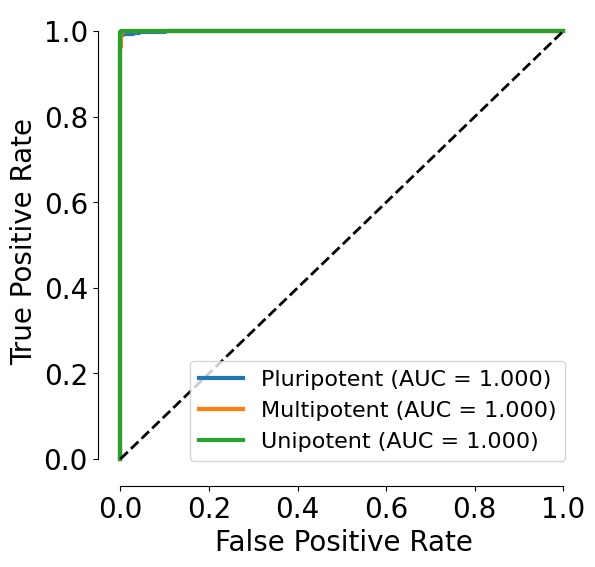

In [44]:
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(label_bin[:, i], prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(6, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=3,
             label='{0} (AUC = {1:0.3f})'.format(label_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], linestyle='dashed', color='black', lw=2)

plt.xlim([-0.02, 1.03])
plt.ylim([-0.03, 1.05])
sns.despine(right=True, top=True, offset=10, trim=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.legend(loc='lower right', prop={'size': 16})
plt.savefig('lr_roc.png', dpi=1200, bbox_inches='tight')
plt.show()

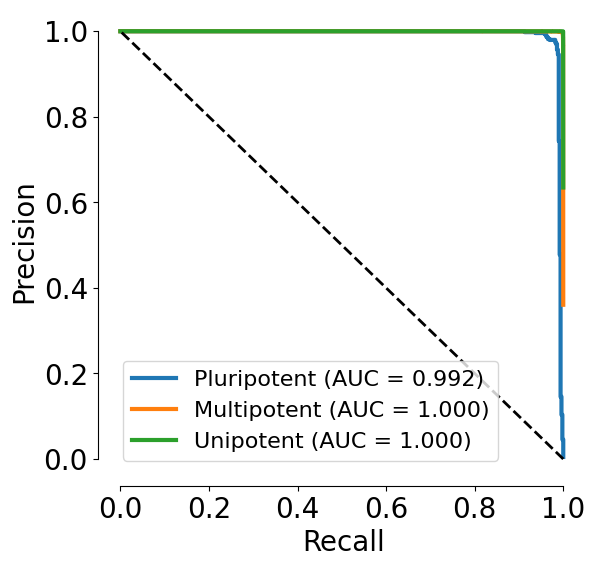

In [46]:
n_classes = 3
precision = dict()
recall = dict()
pr_auc = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(label_bin[:, i], prob[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

plt.figure(figsize=(6, 6))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=3,
             label='{0} (AUC = {1:0.3f})'.format(label_names[i], pr_auc[i]))

plt.plot([1, 0], [0, 1], linestyle='dashed', color='black', lw=2)

plt.xlim([-0.02, 1.03])
plt.ylim([-0.03, 1.05])
sns.despine(right=True, top=True, offset=10, trim=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Recall', fontsize=20)
plt.ylabel('Precision', fontsize=20)
plt.legend(loc='lower left', prop={'size': 16})
plt.savefig('lr_pr.png', dpi=1200, bbox_inches='tight')
plt.show()

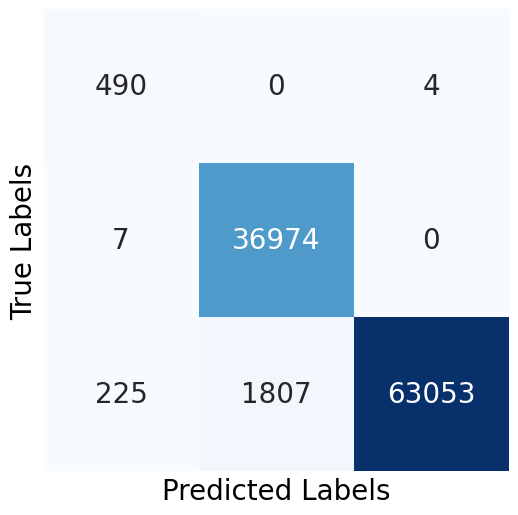

In [51]:
cm = confusion_matrix(test_meta['true_label'], test_meta['pred_label'])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names, 
            cbar=False, annot_kws={"size": 20})
plt.xlabel('Predicted Labels', fontsize=20)
plt.ylabel('True Labels', fontsize=20)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20, rotation=0)
plt.xticks([])  # Remove x-ticks
plt.yticks([])  # Remove y-ticks
plt.savefig('lr_cm.png', dpi=1200, bbox_inches='tight')
plt.show()

In [205]:
report = classification_report(test_meta['true_label'], test_meta['pred_label'], target_names=label_names)
print(report)

              precision    recall  f1-score   support

 Pluripotent       0.03      0.92      0.06       494
 Multipotent       0.89      0.76      0.82     36981
   Unipotent       1.00      0.87      0.93     65085

    accuracy                           0.83    102560
   macro avg       0.64      0.85      0.60    102560
weighted avg       0.95      0.83      0.89    102560



In [211]:
accuracy_score(test_meta['true_label'], test_meta['pred_label'])

0.8293389235569423

In [ ]:
# smote
LR = 0.6592238689547582
SVC = 0.9952320592823712
DT = 0.7559282371294852
RF = 0.6472016380655227
MLP = 0.8909223868954759
XGB = 0.8293389235569423

In [ ]:
# comp
LR = 0.9800799531981279
SVC = 0.9096236349453978
DT = 0.6152203588143526
RF = 0.46765795631825274
MLP = 0.4986836973478939
XGB = 0.6388748049921997

In [ ]:
# ensembl
LR = 0.9800799531981279
DT = 0.6660003900156006
RF = 0.5022328393135725
MLP = 0.4467628705148206
XGB = 0.6413124024960999

In [ ]:
LR = 0.9932445624585107
RF = 0.3882717013549924
DT = 0.5151118747315397
MLP = 0.4092799406458667
XGB = 0.4844097778124878